# Predition of car price using Linear Regression

In [181]:
#import the required libray.
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure
import sys
from pylab import *
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: read the dataset from csv and understanding the structure of dataset.

In [134]:
#read the csv file and display the dataset.
cars_df = pd.read_csv("used_cars_data.csv")
cars_df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#display the shape and information of the dataset.
print(cars_df.shape)
print(cars_df.info())

(7253, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


# Step 1-1: Analysis of dataset

In [4]:
#get the unique Name of cars.
cars_name = cars_df['Name'].unique()
print("the number of unique cars:", len(cars_name))
print(cars_name)

the number of unique cars: 2041
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']


In [5]:
#get the unique year from dataset
cars_year = cars_df['Year'].unique()
cars_year.sort()
print(cars_year)

[1996 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [6]:
#get the cars which produced in same year
cars_produces_in = []
for year in cars_year:
    each_year = cars_df.loc[cars_df["Year"] == year]
    print("----------------------------------------{0}, {1} cars--------------------------------------------------"\
          .format(year, each_year.shape[0]))
    print(each_year)

----------------------------------------1996, 1 cars--------------------------------------------------
      S.No.                               Name Location  Year  \
6216   6216  Hindustan Motors Contessa 2.0 DSL     Pune  1996   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
6216              65000    Diesel       Manual     Second  14.1 kmpl  1995 CC   

         Power  Seats New_Price  Price  
6216  null bhp    5.0       NaN    NaN  
----------------------------------------1998, 4 cars--------------------------------------------------
      S.No.                               Name   Location  Year  \
3138   3138                     Maruti Zen LXI     Jaipur  1998   
3749   3749  Mercedes-Benz E-Class 250 D W 210     Mumbai  1998   
4709   4709                     Maruti 1000 AC  Hyderabad  1998   
5716   5716                      Maruti Zen LX     Jaipur  1998   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
3

In [7]:
#get the unique fuel type from dataset
fuel_type = cars_df['Fuel_Type'].unique()
fuel_type.sort()
print(fuel_type)

['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']


In [8]:
#get the unique cars by fuel type
for fuel in fuel_type:
    cars_byfuel = cars_df.loc[cars_df['Fuel_Type'] == fuel]
    print("{}, {} cars".format(fuel, cars_byfuel.shape[0]))

CNG, 62 cars
Diesel, 3852 cars
Electric, 2 cars
LPG, 12 cars
Petrol, 3325 cars


# Step 1-2: data cleaning

In [9]:
#remove the cars which price is none from dataset
total_num = cars_df.shape[0]
cars_df_byprice = cars_df[cars_df['Price'].notna()]
newcars_num = cars_df_byprice.shape[0]
print("removed the {} cars".format(total_num-newcars_num))

removed the 1234 cars


# Step 1-3: visualizing the data

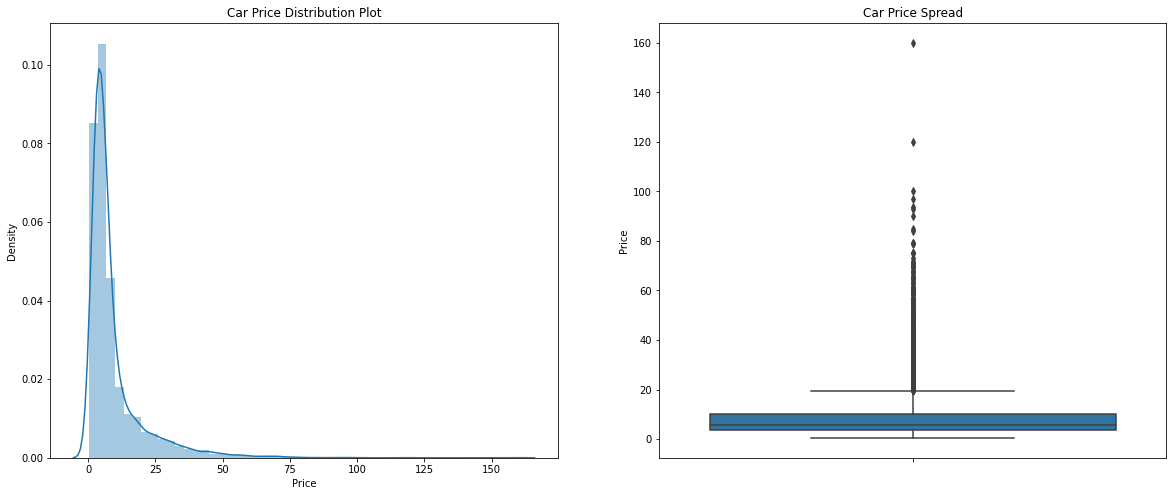

In [10]:
#show the price distribution of cars.
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_df_byprice.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_df_byprice.Price)

plt.show()

In [11]:
#get the statistical summary about the price
print(cars_df_byprice.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))
print("Inference :\
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low.\
There is a significant difference between the mean and the median of the price distribution.\
The data points are far spread out from the mean, which indicates a high variance in the car prices.")

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
85%        16.500000
90%        22.500000
100%      160.000000
max       160.000000
Name: Price, dtype: float64
Inference :The plot seemed to be right-skewed, meaning that the most prices in the dataset are low.There is a significant difference between the mean and the median of the price distribution.The data points are far spread out from the mean, which indicates a high variance in the car prices.


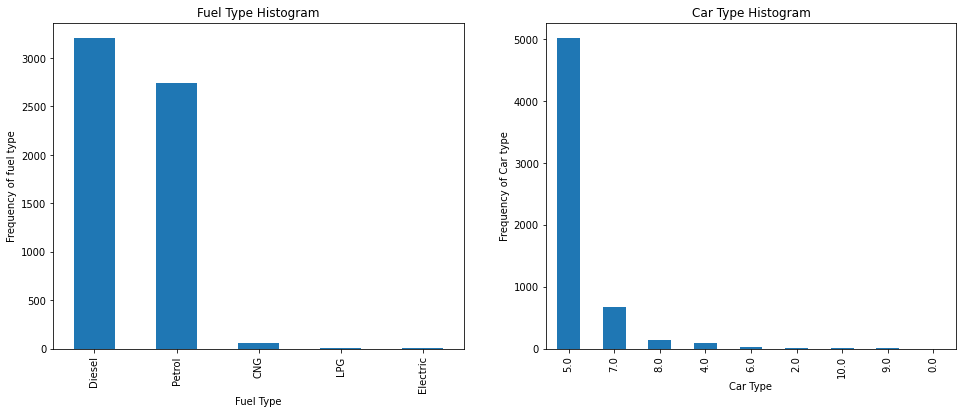

In [12]:
#show the various categories from dataset
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars_df_byprice.Fuel_Type.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,2)
plt1 = cars_df_byprice.Seats.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

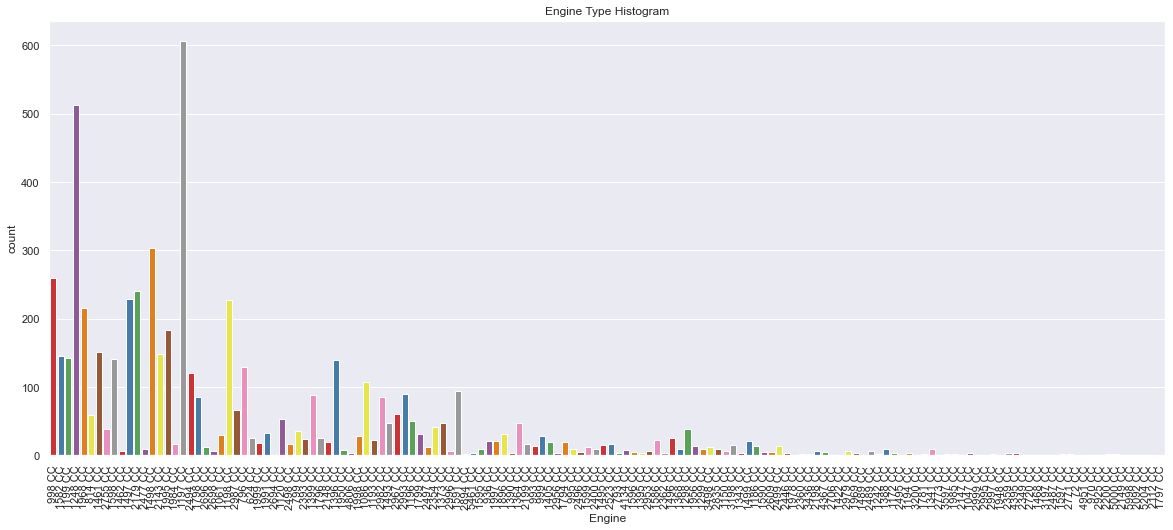

In [44]:
#show the histogram of a engine
plt.figure(figsize=(20,8))
plt.title('Engine Type Histogram')
chart = sns.countplot(cars_df_byprice.Engine, palette=("Set1"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

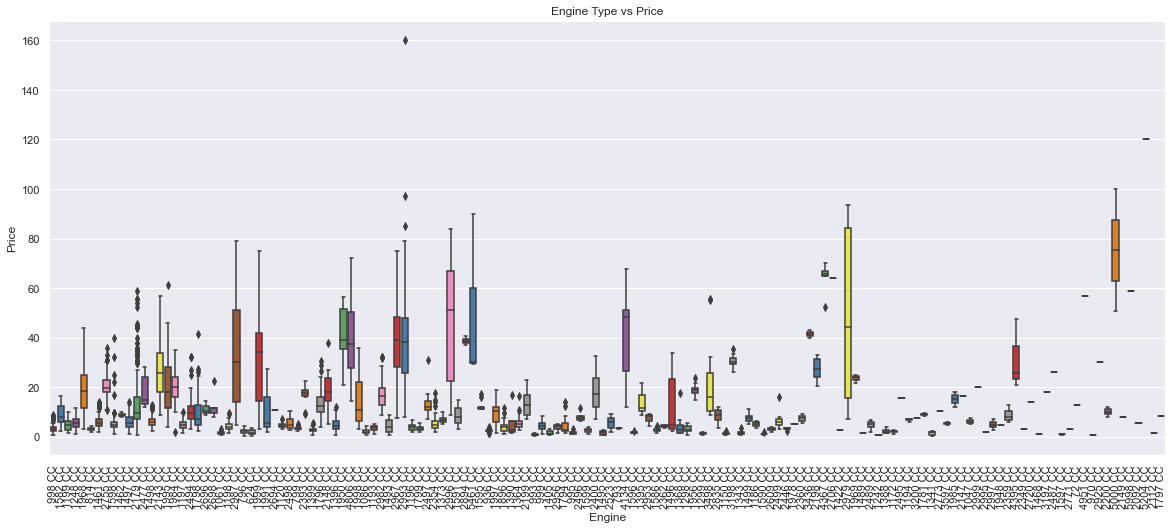

In [40]:
#show the box plot of relation between engine type and price
plt.figure(figsize=(20,8))
plt.title('Engine Type vs Price')
chart = sns.boxplot(x=cars_df_byprice.Engine, y=cars_df_byprice.Price, palette=("Set1"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()



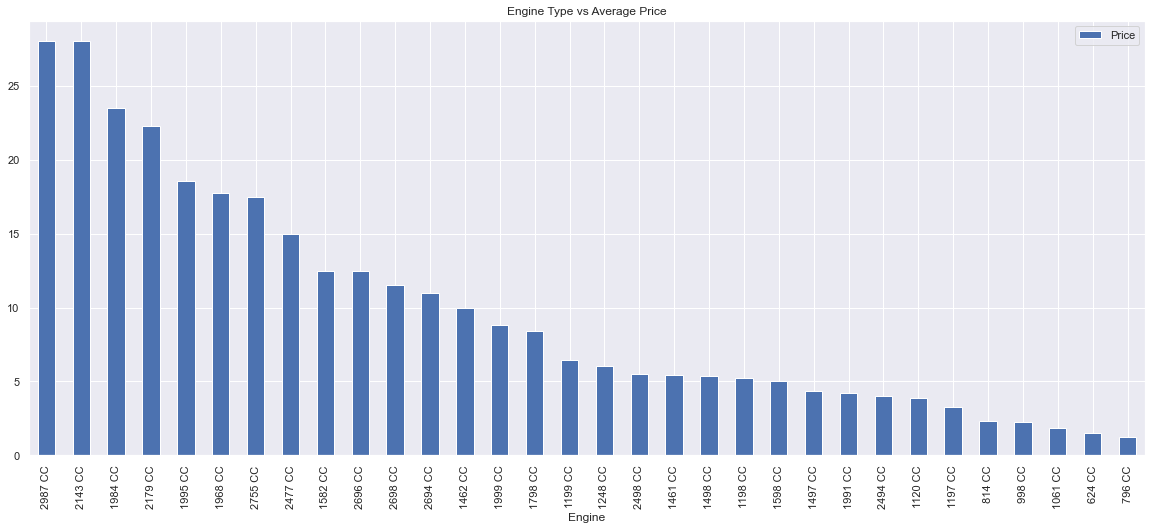

In [75]:
#show the relation between engine type and average price for first 50 data
df = pd.DataFrame(cars_df_byprice[:50].groupby(['Engine'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(20,8))
plt.title('Engine Type vs Average Price')
plt.show()

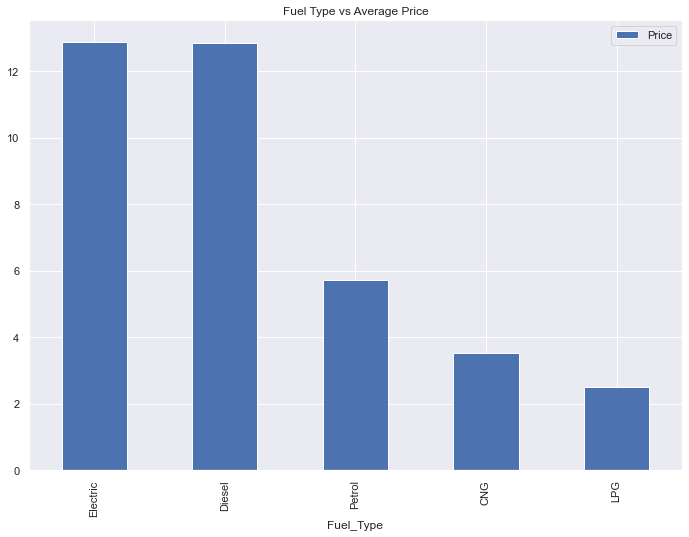

In [51]:
#show the relation between car fuel type and average price
df = pd.DataFrame(cars_df_byprice.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()



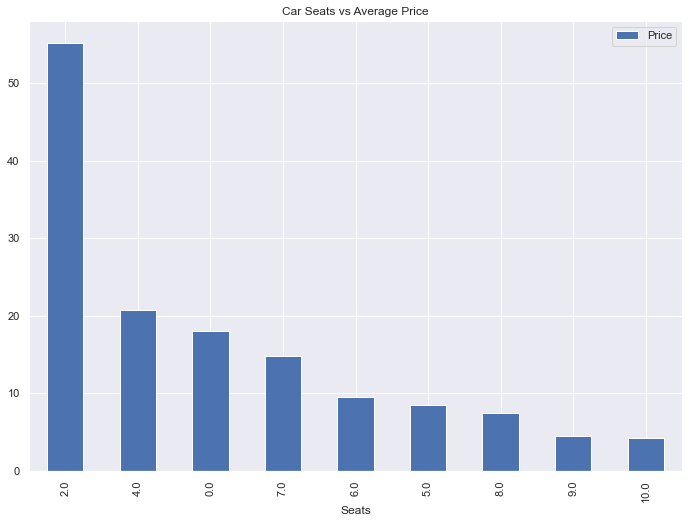

In [52]:
#show the relation between car seats and average price
df = pd.DataFrame(cars_df_byprice.groupby(['Seats'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Seats vs Average Price')
plt.show()

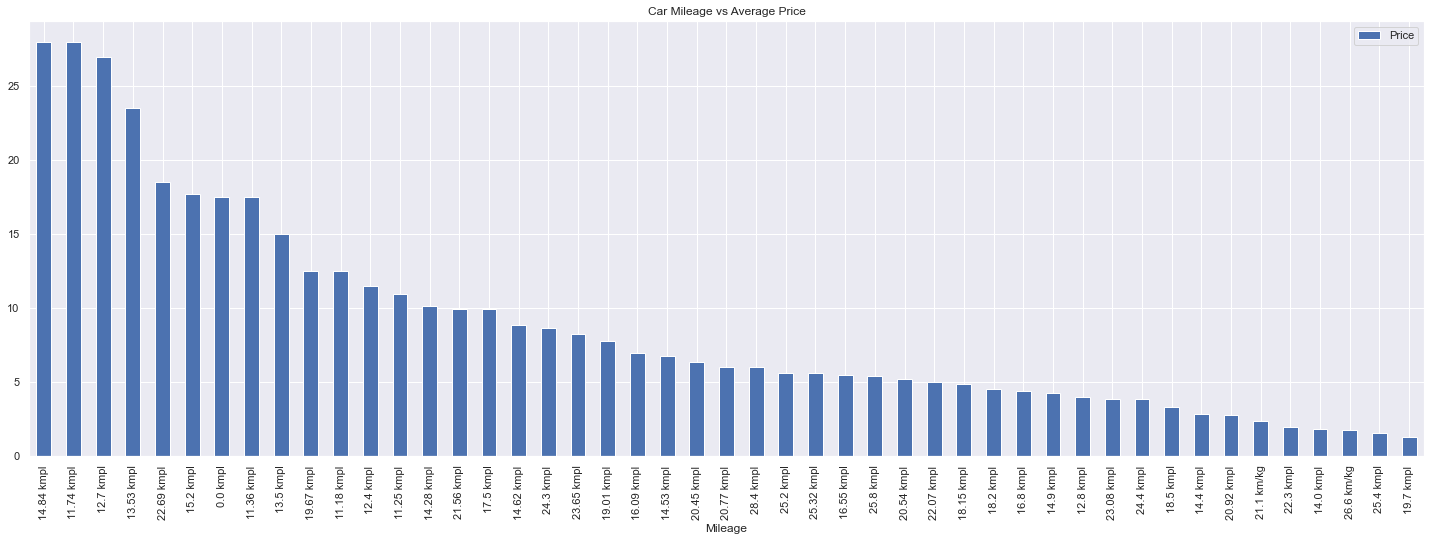

In [70]:
#show the relation between Mileage and average price for first 50 data
df = pd.DataFrame(cars_df_byprice[:50].groupby(['Mileage'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(25,8))
plt.title('Car Mileage vs Average Price')
plt.show()

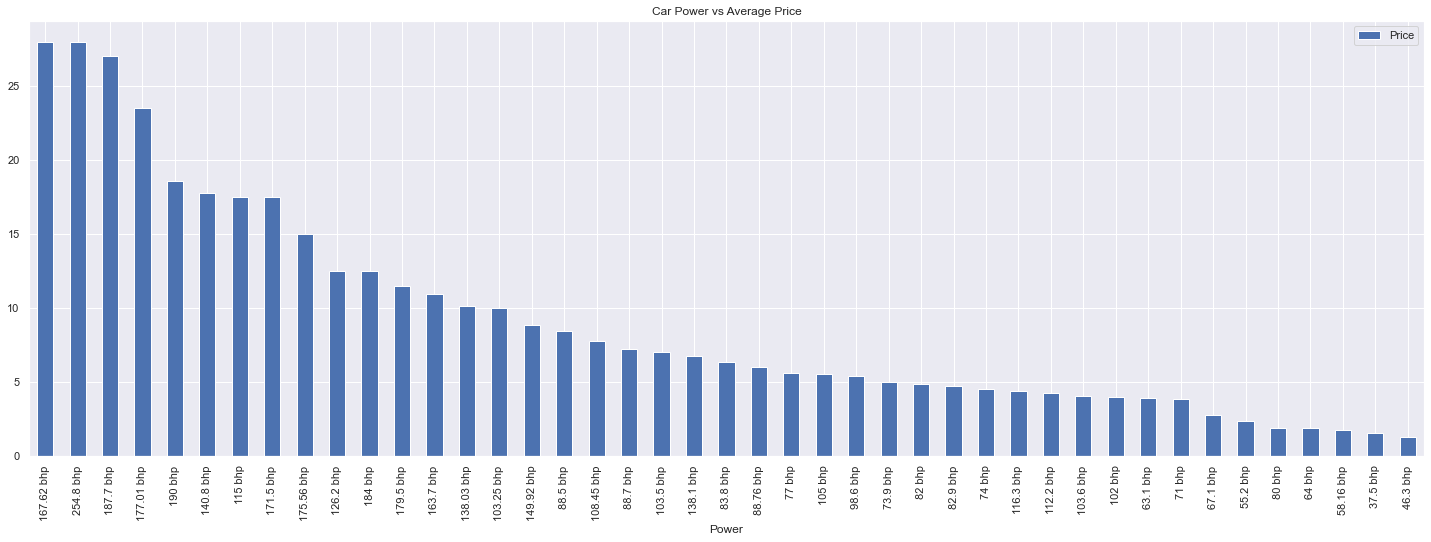

In [69]:
#show the relation between car Power and average price for first 50 data
df = pd.DataFrame(cars_df_byprice[:50].groupby(['Power'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(25,8))
plt.title('Car Power vs Average Price')
plt.show()

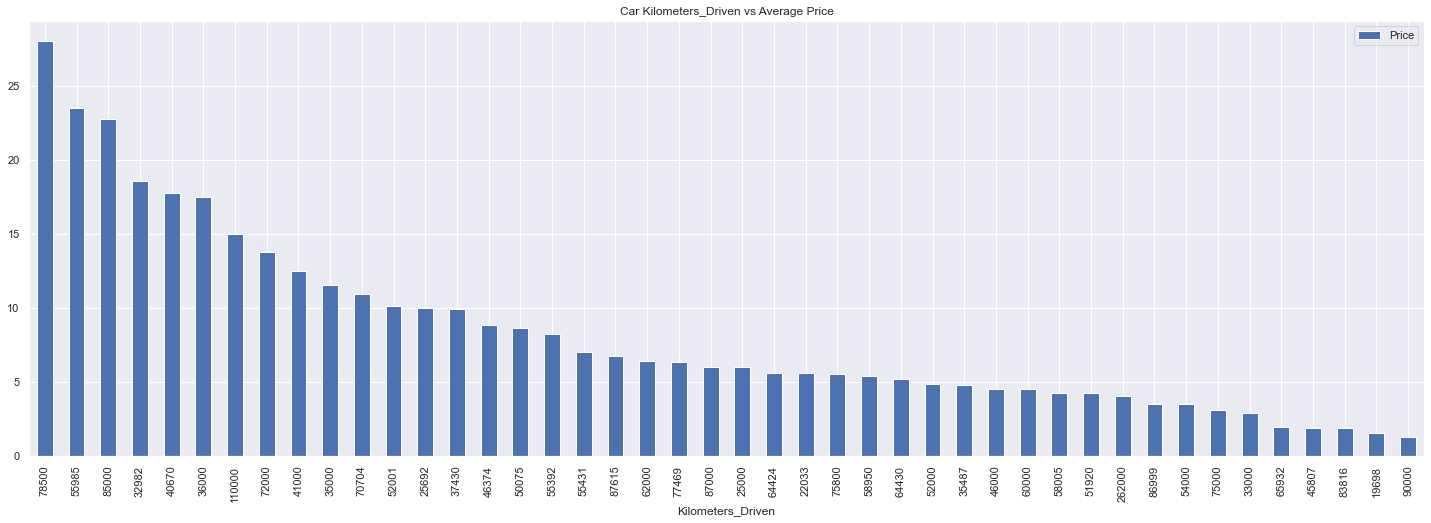

In [71]:
#show the relation between Kilometers_Driven and average price for first 50 data
df = pd.DataFrame(cars_df_byprice[:50].groupby(['Kilometers_Driven'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(25,8))
plt.title('Car Kilometers_Driven vs Average Price')
plt.show()

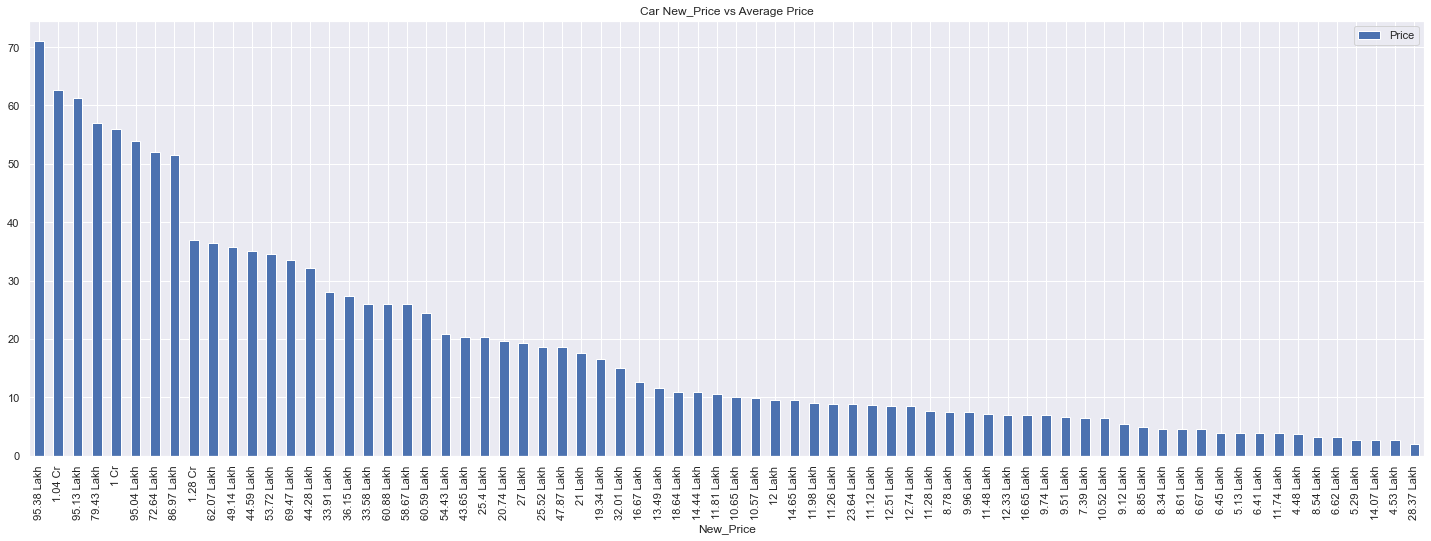

In [74]:
#show the relation between New_Price and average price for first 50 data
df = pd.DataFrame(cars_df_byprice[:500].groupby(['New_Price'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(25,8))
plt.title('Car New_Price vs Average Price')
plt.show()

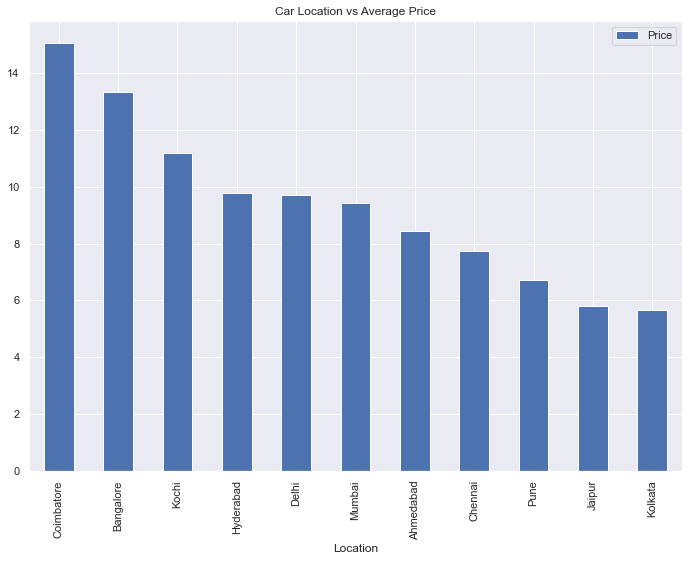

In [60]:
#show the relation between Location and average price
df = pd.DataFrame(cars_df_byprice.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Location vs Average Price')
plt.show()

# Step 2: Feature engineering

In [86]:
#get the data which Kilometers_Driven is 650 0000 and year is 2017

high_driven_2017 = cars_df[(cars_df['Kilometers_Driven'] == 6500000) & (cars_df['Year'] == 2017)]

print(high_driven)

      S.No.                       Name Location  Year  Kilometers_Driven  \
2328   2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000   

     Fuel_Type Transmission Owner_Type     Mileage   Engine    Power  Seats  \
2328    Diesel    Automatic      First  15.97 kmpl  2993 CC  258 bhp    5.0   

     New_Price  Price  
2328       NaN   65.0  


In [91]:
#filter the dataframe by Mileage is zero
mileage_df = cars_df.loc[~(cars_df['Mileage'] == '0.0 kmpl')]
print(mileage_df.shape)
print(mileage_df)

(7172, 14)
      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission

In [137]:
#get the model and brand from overall Name
Brand = mileage_df['Name'].apply(lambda x : x.split(' ')[0])
#insert the brand into dataframe
mileage_df.insert(3,"Brand",Brand)
print(cars_df.head())
#get the unique brand
Brand_unique = Brand.unique()
print(Brand_unique)
#get the model of car
model = mileage_df['Name'].apply(lambda x : x.split(' ')[1:])
print(model)

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0 

In [138]:
#Binning the Car Brand based on avg prices of each Brand.
mileage_df['Price'] = mileage_df['Price'].astype('float')
temp = mileage_df.copy()
table = temp.groupby(['Brand'])['Price'].mean()
print(table)


Brand
Ambassador         1.350000
Audi              25.527234
BMW               25.243146
Bentley           59.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.370000
Force              9.333333
Ford               6.900401
Hindustan               NaN
Honda              5.428165
Hyundai            5.447823
ISUZU             12.045000
Isuzu             20.000000
Jaguar            37.632250
Jeep              18.718667
Lamborghini      120.000000
Land              42.526078
Mahindra           8.073333
Maruti             4.519926
Mercedes-Benz     26.374412
Mini              26.896923
Mitsubishi        11.058889
Nissan             4.738352
OpelCorsa               NaN
Porsche           48.348333
Renault            5.799034
Skoda              7.584620
Tata               3.562849
Toyota            11.622714
Volkswagen         5.306815
Volvo             18.802857
Name: Price, dtype: float64


In [370]:
#remove the data which Price is 0
filtered_cars_df = mileage_df[cars_df['Price'].notna()]
print(filtered_cars_df.head())

   S.No.                              Name    Location    Brand  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai   Maruti  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  Hyundai  2015   
2      2                      Honda Jazz V     Chennai    Honda  2011   
3      3                 Maruti Ertiga VDI     Chennai   Maruti  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore     Audi  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126

# Step 3 : Train-Test Split and feature scaling

In [371]:
#drop some columns
droped_df = filtered_cars_df.drop(['S.No.', 'Name', 'Location', 'Brand', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'New_Price'], axis=1)
droped_df_power = droped_df[~(droped_df['Power'] == 'null bhp')]
droped_df_mileage = droped_df_power[~(droped_df_power['Mileage'] == '0.0 kmpl')]

droped_df_mileage['Power'] = droped_df_mileage.Power.astype(str)
droped_df_mileage['Mileage'] = droped_df_mileage.Mileage.astype(str)

Power = droped_df_mileage['Power'].apply(lambda x : x.split(' ')[0])
Mileage = droped_df_mileage['Mileage'].apply(lambda x : x.split(' ')[0])

droped_df_mileage['Power'] = Power
droped_df_mileage['Mileage'] = Mileage

droped_df_mileage['Power'] = droped_df_mileage.Power.astype(float)
droped_df_mileage['Mileage'] = droped_df_mileage.Mileage.astype(float)
droped_df_mileage['Kilometers_Driven'] = droped_df_mileage.Power.astype(float)
droped_df_mileage['Seats'] = droped_df_mileage.Mileage.astype(float)
droped_df_mileage['Price'] = droped_df_mileage.Mileage.astype(float)
print(droped_df_mileage)

      Year  Kilometers_Driven  Mileage   Power  Seats  Price
0     2010              58.16    26.60   58.16  26.60  26.60
1     2015             126.20    19.67  126.20  19.67  19.67
2     2011              88.70    18.20   88.70  18.20  18.20
3     2012              88.76    20.77   88.76  20.77  20.77
4     2013             140.80    15.20  140.80  15.20  15.20
...    ...                ...      ...     ...    ...    ...
6014  2014              74.00    28.40   74.00  28.40  28.40
6015  2015              71.00    24.40   71.00  24.40  24.40
6016  2012             112.00    14.00  112.00  14.00  14.00
6017  2013              67.10    18.90   67.10  18.90  18.90
6018  2011              57.60    25.44   57.60  25.44  25.44

[5872 rows x 6 columns]


In [422]:
#MinMaxScaler scaling
np.random.seed(0)
df_train, df_test = train_test_split(droped_df_mileage, train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()
num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats','Price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
print(df_train.shape)
print(df_test.shape)


(4110, 6)
(1762, 6)


In [423]:
print(df_train.describe())

              Year  Kilometers_Driven      Mileage        Power        Seats  \
count  4110.000000        4091.000000  4109.000000  4091.000000  4109.000000   
mean      0.733785           0.150011     0.440141     0.150011     0.440141   
std       0.154001           0.102929     0.154815     0.102929     0.154815   
min       0.000000           0.000000     0.000000     0.000000     0.000000   
25%       0.666667           0.077596     0.327561     0.077596     0.327561   
50%       0.761905           0.113731     0.434783     0.113731     0.434783   
75%       0.857143           0.197604     0.541636     0.197604     0.541636   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

             Price  
count  4109.000000  
mean      0.440141  
std       0.154815  
min       0.000000  
25%       0.327561  
50%       0.434783  
75%       0.541636  
max       1.000000  


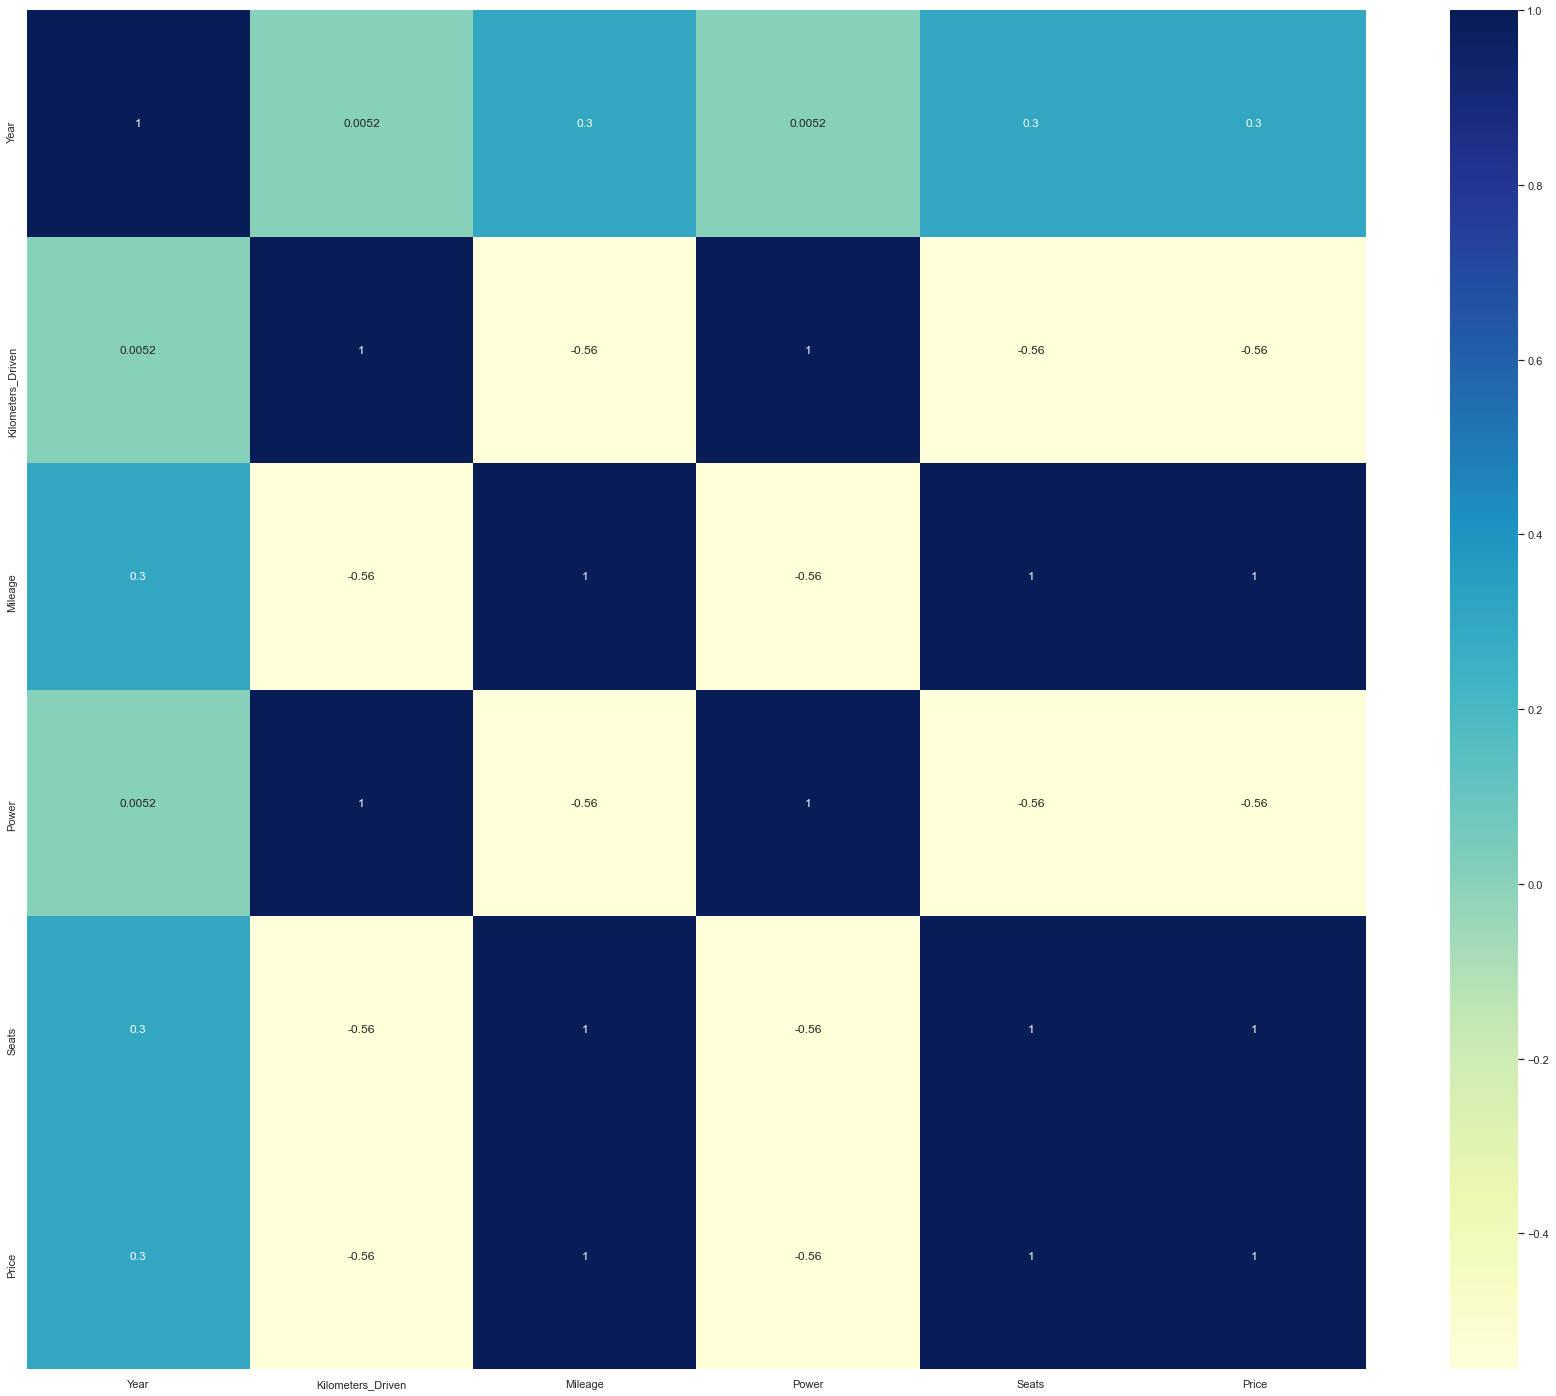

In [424]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [425]:
#Dividing data into X and y variables
removedNan_df = df_train.dropna()
y_train = removedNan_df.pop('Price')
X_train = removedNan_df
print(X_train.shape)
print(y_train.shape)

(4090, 5)
(4090,)


In [426]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 5)
rfe = rfe.fit(X_train, y_train)

In [427]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
X_train.columns[rfe.support_]
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Year,Kilometers_Driven,Mileage,Power,Seats
5803,0.714286,0.419551,0.180545,0.419551,0.180545
5099,0.666667,0.062571,0.535004,0.062571,0.535004
511,0.523810,0.053062,0.424466,0.053062,0.424466
1038,0.619048,0.520730,0.140015,0.520730,0.140015
3308,0.761905,0.312001,0.259396,0.312001,0.259396


In [411]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [412]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.464e+33
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:48:36   Log-Likelihood:                 63799.
No. Observations:                1757   AIC:                        -1.276e+05
Df Residuals:                    1753   BIC:                        -1.276e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.144e-16   5.64e-1

In [413]:
X_train_new = X_train_rfe.drop(["Kilometers_Driven"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.010e+32
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:48:39   Log-Likelihood:                 60513.
No. Observations:                1757   AIC:                        -1.210e+05
Df Residuals:                    1753   BIC:                        -1.210e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e-17   3.66e-17      0.465      0.6

In [414]:
X_train_new = X_train_new.drop(["Mileage"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.929e+32
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:48:39   Log-Likelihood:                 61464.
No. Observations:                1757   AIC:                        -1.229e+05
Df Residuals:                    1753   BIC:                        -1.229e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.681e-16   2.13e-17      7.885      0.0

,Features,VIF
0,const,33.02
3,Seats,1.71
2,Power,1.55
1,Year,1.17


In [415]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [416]:
X_train_new = X_train_new.drop(["Power"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.815e+31
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:48:41   Log-Likelihood:                 58901.
No. Observations:                1757   AIC:                        -1.178e+05
Df Residuals:                    1754   BIC:                        -1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.621e-16   8.05e-17      3.256      0.0

,Features,VIF
0,const,25.49
1,Year,1.10
2,Seats,1.10


# Step 4 : Evaluation the model

# step-4-1:Residual Analysis of Model

Text(0.5, 0, 'Errors')

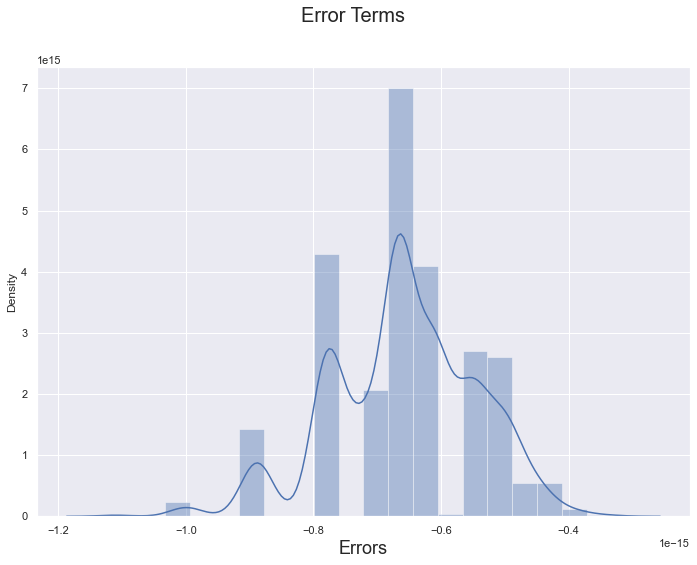

In [417]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# step-4-1:Prediction and Evaluation

In [418]:
#Scaling the test set
removed_test_df = df_test.dropna()
num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats','Price']
removed_test_df[num_vars] = scaler.fit_transform(removed_test_df[num_vars])
print(removed_test_df)

          Year  Kilometers_Driven   Mileage     Power     Seats     Price
1169  0.571429           0.262263  0.281874  0.262263  0.281874  0.281874
4283  0.761905           0.177907  0.569124  0.177907  0.569124  0.569124
282   0.952381           0.400154  0.175499  0.400154  0.175499  0.175499
2253  0.809524           0.091927  0.495392  0.091927  0.495392  0.495392
2522  0.333333           0.165701  0.115207  0.165701  0.115207  0.115207
...        ...                ...       ...       ...       ...       ...
930   0.428571           0.057551  0.410906  0.057551  0.410906  0.410906
5789  1.000000           0.036887  0.678571  0.036887  0.678571  0.678571
5549  0.904762           0.124372  0.710445  0.124372  0.710445  0.710445
3334  0.714286           0.063422  0.617896  0.063422  0.617896  0.617896
2540  0.904762           0.040556  0.522273  0.040556  0.522273  0.522273

[4088 rows x 6 columns]


In [419]:
#Dividing into X and y
y_test = removed_test_df.pop('Price')
X_test = removed_test_df
print(X_test.shape)
print(y_test.shape)

(4088, 5)
(4088,)


In [420]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [421]:
# Making predictions
y_pred = lm.predict(X_test_new) 
r2_score(y_test, y_pred)

1.0

Text(0, 0.5, 'y_pred')

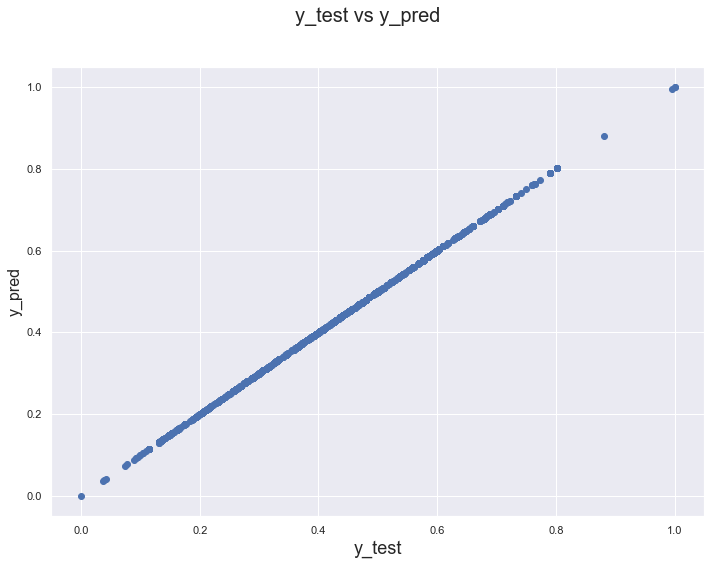

In [394]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 